<a href="https://colab.research.google.com/github/couqdev/MachineLearning/blob/main/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ĐỀ TÀI GIỮA KÌ MÁY HỌC

1. Thành viên: 
+ Trần Đặng Quốc MSSV: 20130376
+ Nguyễn Minh Đức MSSV: 20130233


2. Dataset: Chess(king-rook vs, king)

3. Các thuật toán lựa thực hiện:
+ Neural network
+ SVM
+ kNN
+ Naïve Bayes
+ RandomForest
+ Decision Tree

1. Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/MachineLeaning'

Mounted at /content/gdrive
/content/gdrive/MyDrive/MachineLeaning


In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import seaborn as sns

2. Load dataset

In [ ]:
dataset = pd.read_csv("datasetML.csv")
dataset

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank,optimal depth-of-win for White
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw
...,...,...,...,...,...,...,...
28051,b,1,g,7,e,5,sixteen
28052,b,1,g,7,e,6,sixteen
28053,b,1,g,7,e,7,sixteen
28054,b,1,g,7,f,5,sixteen


Thông tin thuộc tính:

1. White King file - Vị trí cột quân Vua Trắng trên bàn cờ.
2. White King rank - Vị trí hàng quân Vua Trắng trên bàn cờ.
3. White Rook file - Vị trí cột quân Xe Trắng trên bàn cờ.
4. White Rook rank - Vị trí hàng quân Xe Trắng trên bàn cờ.
5. Black King file - Vị trí cột quân Vua Đen trên bàn cờ.
6. Black King rank - Vị trí hàng quân Vua Đen trên bàn cờ.
7. optimal depth-of-win for White - Thuộc tính này biểu diễn chiến thắng của quân Trắng dựa trên độ sâu tối ưu của nước đi, với giá trị từ {zero, one, two, ..., sixteen}, hoặc hòa(draw).

In [ ]:
# check missing data

print(dataset.isnull().sum())

White King file                   0
White King rank                   0
White Rook file                   0
White Rook rank                   0
Black King file                   0
Black King rank                   0
optimal depth-of-win for White    0
dtype: int64


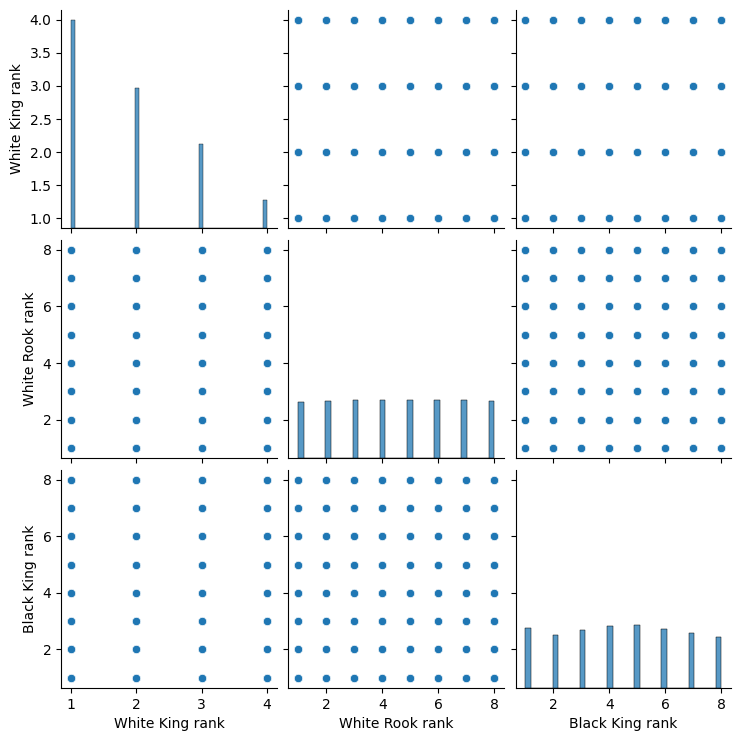

In [ ]:
sns.pairplot(dataset.iloc[:,:-1])

<ipython-input-140-9d3fd451b567>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

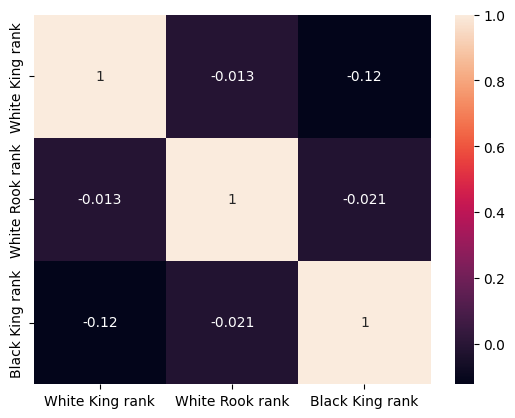

In [ ]:
sns.heatmap(dataset.corr(),annot=True)

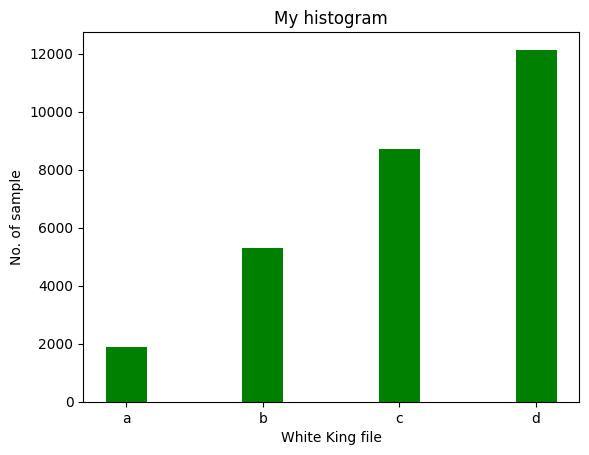

In [ ]:
# frequencies
data=dataset['White King file']
# setting the ranges and no. of intervals
range = (-0.5,3.5)
bins = 4
# plotting a histogram
plt.hist(data, bins, range, color='green', histtype='bar', rwidth=0.3)
# x-axis label
plt.xlabel('White King file')
# frequency label
plt.ylabel('No. of sample')
# plot title
plt.title('My histogram')
# function to show the plot
plt.show()

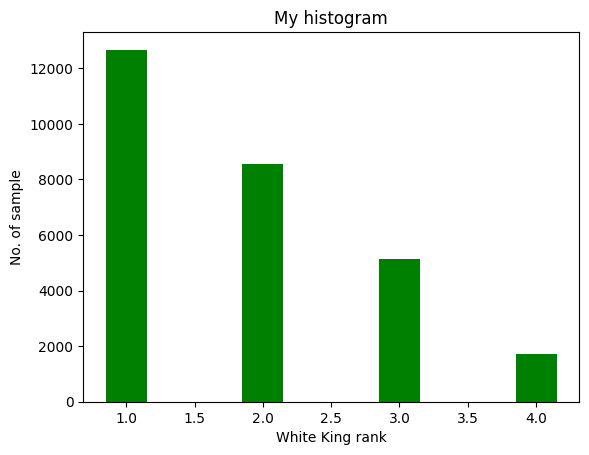

In [ ]:
# frequencies
data=dataset['White King rank']
# setting the ranges and no. of intervals
range = (0.5,4.5)
bins = 4
# plotting a histogram
plt.hist(data, bins, range, color='green', histtype='bar', rwidth=0.3)
# x-axis label
plt.xlabel('White King rank')
# frequency label
plt.ylabel('No. of sample')
# plot title
plt.title('My histogram')
# function to show the plot
plt.show()

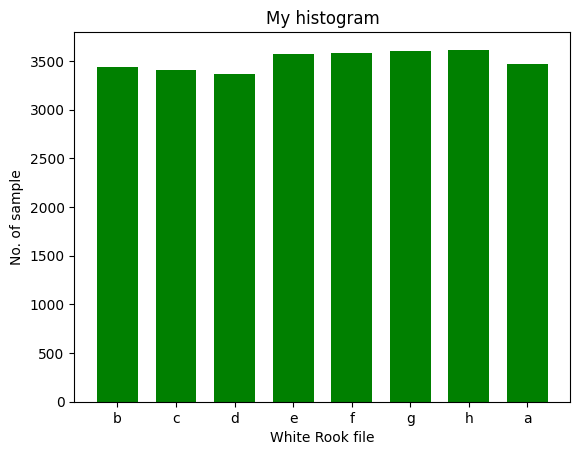

In [ ]:
# frequencies
data=dataset['White Rook file']
# setting the ranges and no. of intervals
range = (-0.5,7.5)
bins = 8
# plotting a histogram
plt.hist(data, bins, range, color='green', histtype='bar', rwidth=0.7)
# x-axis label
plt.xlabel('White Rook file')
# frequency label
plt.ylabel('No. of sample')
# plot title
plt.title('My histogram')
# function to show the plot
plt.show()

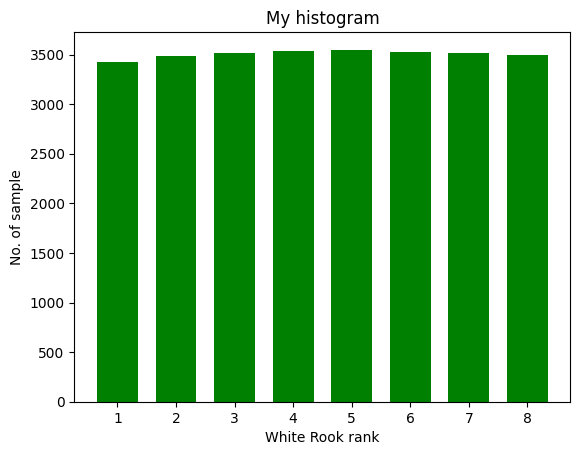

In [ ]:
# frequencies
data=dataset['White Rook rank']
# setting the ranges and no. of intervals
range = (0.5,8.5)
bins = 8
# plotting a histogram
plt.hist(data, bins, range, color='green', histtype='bar', rwidth=0.7)
# x-axis label
plt.xlabel('White Rook rank')
# frequency label
plt.ylabel('No. of sample')
# plot title
plt.title('My histogram')
# function to show the plot
plt.show()

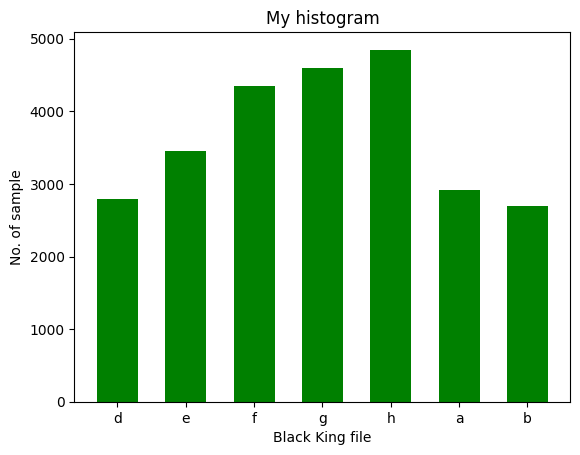

In [ ]:
# frequencies
data=dataset['Black King file']
# setting the ranges and no. of intervals
range = (0.5,7.5)
bins = 7
# plotting a histogram
plt.hist(data, bins, range, color='green', histtype='bar', rwidth=0.6)
# x-axis label
plt.xlabel('Black King file')
# frequency label
plt.ylabel('No. of sample')
# plot title
plt.title('My histogram')
# function to show the plot
plt.show()

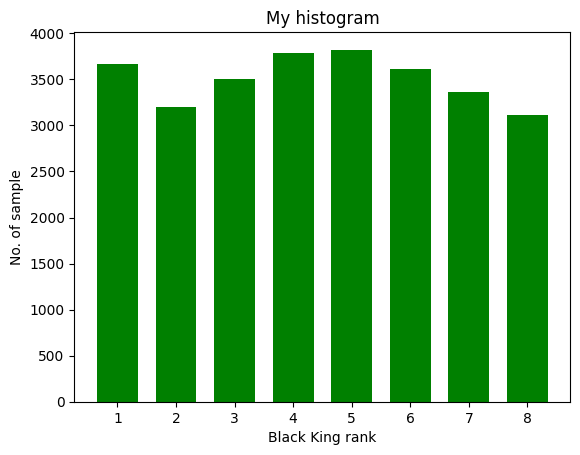

In [ ]:
# frequencies
data=dataset['Black King rank']
# setting the ranges and no. of intervals
range = (0.5,8.5)
bins = 8
# plotting a histogram
plt.hist(data, bins, range, color='green', histtype='bar', rwidth=0.7)
# x-axis label
plt.xlabel('Black King rank')
# frequency label
plt.ylabel('No. of sample')
# plot title
plt.title('My histogram')
# function to show the plot
plt.show()

3. Thuật toán SVM:

3.1 OneHotEncoder:

In [ ]:
encoder = OneHotEncoder(sparse=False)
cat_cols = ['White King file', 'White Rook file', 'Black King file']

dataset3=[dataset['White King file'],dataset['White Rook file'],dataset['Black King file']]
df_encoded = pd.DataFrame(encoder.fit_transform(dataset[cat_cols]),columns=encoder.get_feature_names_out(cat_cols))
df_processed = pd.concat([dataset, df_encoded], axis=1)
df_processed.drop(columns=cat_cols, inplace=True)
df_processed

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,White King rank,White Rook rank,Black King rank,optimal depth-of-win for White,White King file_a,White King file_b,White King file_c,White King file_d,White Rook file_a,White Rook file_b,...,White Rook file_g,White Rook file_h,Black King file_a,Black King file_b,Black King file_c,Black King file_d,Black King file_e,Black King file_f,Black King file_g,Black King file_h
0,1,3,2,draw,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2,draw,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,draw,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,2,draw,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,2,1,draw,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28051,1,7,5,sixteen,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28052,1,7,6,sixteen,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28053,1,7,7,sixteen,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28054,1,7,5,sixteen,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y = df_processed['optimal depth-of-win for White']
X = df_processed.drop('optimal depth-of-win for White', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

3.2 SVM Linear Kernel:

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accurary_linear =  metrics.accuracy_score(y_test, y_pred)
precision_linear = metrics.precision_score(y_test, y_pred, average='macro')
recall_linear = metrics.recall_score(y_test, y_pred, average='macro')
f1_linear = metrics.f1_score(y_test, y_pred, average='macro')

t = PrettyTable(['','accuracy', 'precision', 'recall', 'f1'])
t.add_row(['SVM Linear',round(accurary_linear, 3),round(precision_linear,3),round(recall_linear, 3),round(f1_linear,3)])
print(t)


+------------+----------+-----------+--------+-------+
|            | accuracy | precision | recall |   f1  |
+------------+----------+-----------+--------+-------+
| SVM Linear |  0.359   |   0.428   | 0.341  | 0.346 |
+------------+----------+-----------+--------+-------+


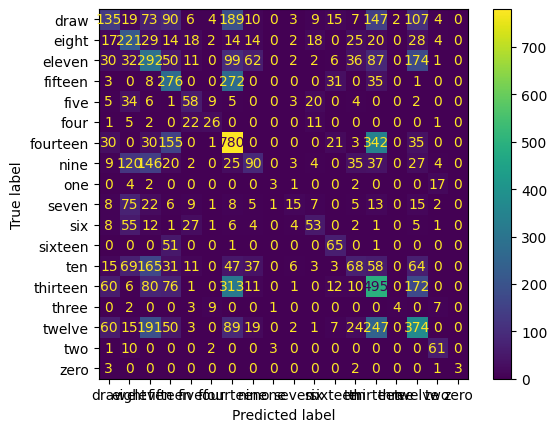

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Áp dụng Cross Validate:

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
clf = svm.SVC(kernel='linear', random_state=0)
scores = cross_val_score(clf, X, y, cv=cv)
print(scores)

[0.35637919 0.35637919 0.34176764 0.35994298 0.35245902 0.34818247
 0.34402852 0.35793226 0.36541889 0.35080214]


In [ ]:
print(scores.mean())

0.3533292295729929


3.3 SVM RBF Kernel:

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accurary_rbf =  metrics.accuracy_score(y_test, y_pred)
precision_rbf = metrics.precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_rbf = metrics.recall_score(y_test, y_pred, average='macro')
f1_rbf = metrics.f1_score(y_test, y_pred, average='macro')

t = PrettyTable(['','accuracy', 'precision', 'recall', 'f1'])
t.add_row(['SVM RBF',round(accurary_rbf, 3),round(precision_rbf,3),round(recall_rbf, 3),round(f1_rbf,3)])
print(t)

+---------+----------+-----------+--------+-------+
|         | accuracy | precision | recall |   f1  |
+---------+----------+-----------+--------+-------+
| SVM RBF |  0.458   |    0.33   | 0.311  | 0.304 |
+---------+----------+-----------+--------+-------+


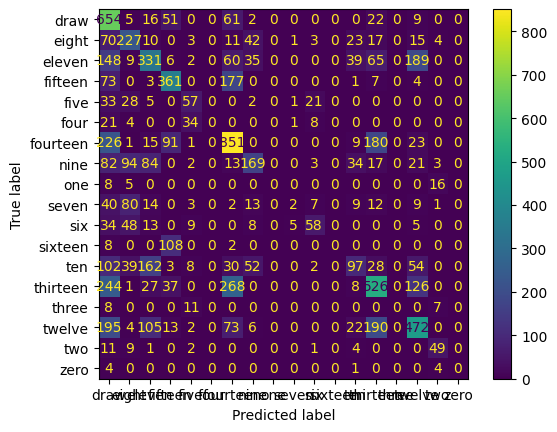

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Áp dụng Cross Validate:

In [ ]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
clf = svm.SVC(kernel='rbf', random_state=42)
scores = cross_val_score(clf, X, y, cv=cv)
print(scores)

[0.47826087 0.47042053 0.46079829 0.46935139 0.45117605 0.46079829
 0.45811052 0.46524064 0.46238859 0.45204991]


In [ ]:
print(scores.mean())

0.46285950782827223


3.4 SVM Sigmoid Kernel:

In [ ]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accurary_sigmoid =  metrics.accuracy_score(y_test, y_pred)
precision_sigmoid = metrics.precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_sigmoid = metrics.recall_score(y_test, y_pred, average='macro')
f1_sigmoid = metrics.f1_score(y_test, y_pred, average='macro')

t = PrettyTable(['','accuracy', 'precision', 'recall', 'f1'])
t.add_row(['SVM Sigmoid',round(accurary_sigmoid, 3),round(precision_sigmoid,3),round(recall_sigmoid, 3),round(f1_sigmoid,3)])
print(t)

+-------------+----------+-----------+--------+-------+
|             | accuracy | precision | recall |   f1  |
+-------------+----------+-----------+--------+-------+
| SVM Sigmoid |  0.113   |   0.103   | 0.063  | 0.051 |
+-------------+----------+-----------+--------+-------+


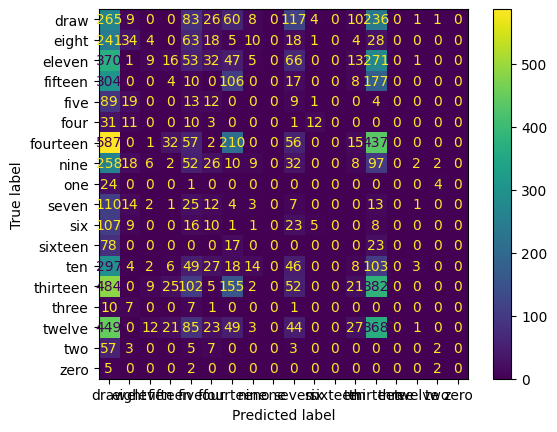

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Áp dụng Cross Validate:

In [ ]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
clf = svm.SVC(kernel='sigmoid', random_state=42)
scores = cross_val_score(clf, X, y, cv=cv)
print(scores)

[0.12116892 0.1233072  0.1318603  0.1233072  0.12009979 0.12401996
 0.12406417 0.14081996 0.13796791 0.12121212]


In [ ]:
print(scores.mean())

0.12678275353425242


3.5 SVM Poly Kernel:

In [ ]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accurary_poly =  metrics.accuracy_score(y_test, y_pred)
precision_poly = metrics.precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_poly = metrics.recall_score(y_test, y_pred, average='macro')
f1_poly = metrics.f1_score(y_test, y_pred, average='macro')

t = PrettyTable(['','accuracy', 'precision', 'recall', 'f1'])
t.add_row(['SVM Poly',round(accurary_poly, 3),round(precision_poly,3),round(recall_poly, 3),round(f1_poly,3)])
print(t)

+----------+----------+-----------+--------+-------+
|          | accuracy | precision | recall |   f1  |
+----------+----------+-----------+--------+-------+
| SVM Poly |  0.429   |   0.391   | 0.275  | 0.287 |
+----------+----------+-----------+--------+-------+


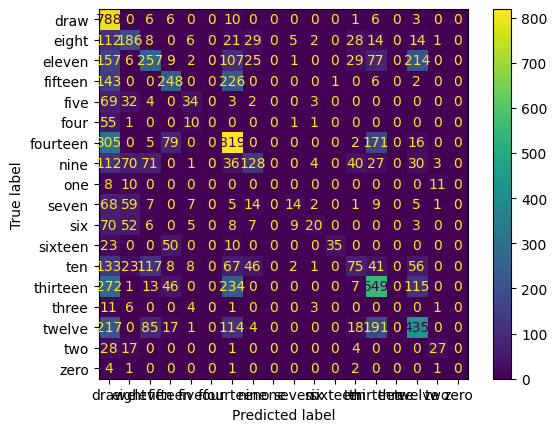

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Áp dụng Cross Validate:

In [ ]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
clf = svm.SVC(kernel='poly', random_state=42)
scores = cross_val_score(clf, X, y, cv=cv)
print(scores)

[0.44226657 0.43941554 0.42587313 0.44369209 0.4212402  0.43228795
 0.44777184 0.41960784 0.42887701 0.42638146]


In [ ]:
print(scores.mean())

0.4327413627279461


3.6 So sánh các karnel của SVM:

In [ ]:
t = PrettyTable(['','accuracy', 'precision', 'recall', 'f1'])
t.add_row(['SVM Linear',round(accurary_linear, 3),round(precision_linear,3),round(recall_linear, 3),round(f1_linear,3)])
t.add_row(['SVM RBF',round(accurary_rbf, 3),round(precision_rbf,3),round(recall_rbf, 3),round(f1_rbf,3)])
t.add_row(['SVM Sigmoid',round(accurary_sigmoid, 3),round(precision_sigmoid,3),round(recall_sigmoid, 3),round(f1_sigmoid,3)])
t.add_row(['SVM Poly',round(accurary_poly, 3),round(precision_poly,3),round(recall_poly, 3),round(f1_poly,3)])
print(t)

+-------------+----------+-----------+--------+-------+
|             | accuracy | precision | recall |   f1  |
+-------------+----------+-----------+--------+-------+
|  SVM Linear |  0.359   |   0.428   | 0.341  | 0.346 |
|   SVM RBF   |  0.458   |    0.33   | 0.311  | 0.304 |
| SVM Sigmoid |  0.113   |   0.103   | 0.063  | 0.051 |
|   SVM Poly  |  0.429   |   0.391   | 0.275  | 0.287 |
+-------------+----------+-----------+--------+-------+


3.7 Áp dụng GridSearchCV:

In [ ]:
param_grid = {'C': [10, 100, 1000],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','linear']}
svc = svm.SVC(random_state=42)
grid_rf_class =  GridSearchCV(estimator=svc ,param_grid=param_grid, n_jobs=4,cv=10,refit=True,return_train_score=True)
grid_rf_class.fit(X_train, y_train)
y_pred = grid_rf_class.predict(X_test)
sorted(grid_rf_class.cv_results_.keys())
print(grid_rf_class.best_params_)
acc_grid = metrics.accuracy_score(y_test, y_pred)
precision_grid = metrics.precision_score(y_test, y_pred, average='micro')
recall_grid = metrics.recall_score(y_test, y_pred, average='micro')
f1_grid = metrics.f1_score(y_test, y_pred, average='micro')

t = PrettyTable(['','accuracy', 'precision', 'recall', 'f1'])
t.add_row(['SVM',round(acc_grid, 3),round(precision_grid,3),round(recall_grid, 3),round(f1_grid,3)])
print(t)

4. Thuật toán KNN:

4.1 KNN với with k={1, 3, 5, …, 29}

In [ ]:
k_range = np.arange(1,30,2)
precision = []
recall = []
f1 = []
accs = []
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(X_train, y_train)
  y_predKNN = KNN.predict(X_test)
  precision.append(metrics.precision_score(y_test, y_predKNN, average='macro', zero_division=0))
  recall.append(metrics.recall_score(y_test, y_predKNN, average='macro'))
  f1.append(metrics.f1_score(y_test, y_predKNN, average='macro'))
  accs.append(metrics.accuracy_score(y_test, y_predKNN))

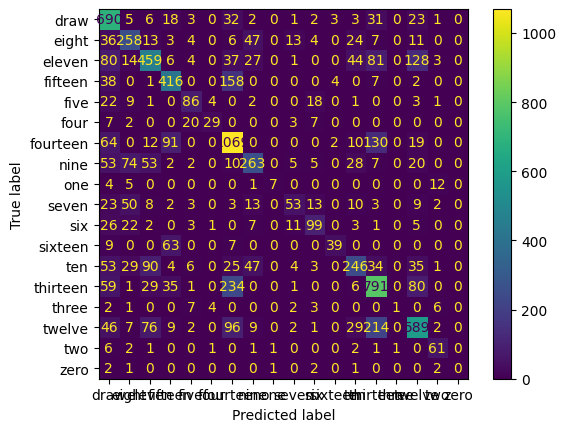

In [ ]:
cm = confusion_matrix(y_test, y_predKNN)
ConfusionMatrixDisplay.from_predictions(y_test, y_predKNN)

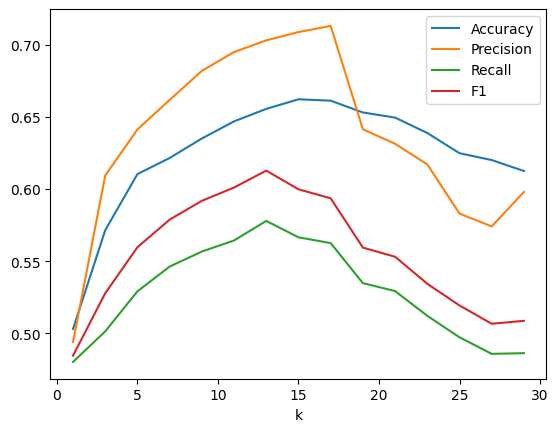

In [ ]:
plt.plot(k_range, accs, label='Accuracy')
plt.plot(k_range, precision, label='Precision')
plt.plot(k_range, recall, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel("k")
plt.legend()

In [ ]:
t = PrettyTable(['','accuracy', 'precision', 'recall', 'f1'])
t.add_row(['KNN',round(max(accs), 3),round(max(precision),3),round(max(recall), 3),round(max(f1),3)])
print(t)

+-----+----------+-----------+--------+-------+
|     | accuracy | precision | recall |   f1  |
+-----+----------+-----------+--------+-------+
| KNN |  0.662   |   0.713   | 0.578  | 0.613 |
+-----+----------+-----------+--------+-------+


4.2 Áp dụng GridSearchCV:

In [ ]:
encoder = OneHotEncoder(sparse=False)
cat_cols = ['White King file', 'White Rook file', 'Black King file']
df_encoded = pd.DataFrame(encoder.fit_transform(dataset[cat_cols]),columns=encoder.get_feature_names_out(cat_cols))
df_processed = pd.concat([dataset, df_encoded], axis=1)
df_processed.drop(columns=cat_cols, inplace=True)
y = df_processed['optimal depth-of-win for White']
X = df_processed.drop('optimal depth-of-win for White', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
grid_params = { 'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
KNN = KNeighborsClassifier()
grid_rf_class =  GridSearchCV(estimator=KNN ,param_grid=grid_params,  n_jobs=4,cv=10,refit=True,return_train_score=True)
grid_rf_class.fit(X_train, y_train)
y_pred = grid_rf_class.predict(X_test)
sorted(grid_rf_class.cv_results_.keys())
print(grid_rf_class.best_params_)

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


In [ ]:
acc_KNN_Grid = metrics.accuracy_score(y_test, y_pred)
precision_KNN_Grid = metrics.precision_score(y_test, y_pred, average='micro')
recall_KNN_Grid = metrics.recall_score(y_test, y_pred, average='micro')
f1_KNN_Grid = metrics.f1_score(y_test, y_pred, average='micro')
t = PrettyTable(['','accuracy', 'precision', 'recall', 'f1'])
t.add_row(['KNN',round(acc_KNN_Grid, 3),round(precision_KNN_Grid,3),round(recall_KNN_Grid, 3),round(f1_KNN_Grid,3)])
print(t)

+-----+----------+-----------+--------+-------+
|     | accuracy | precision | recall |   f1  |
+-----+----------+-----------+--------+-------+
| KNN |  0.708   |   0.708   | 0.708  | 0.708 |
+-----+----------+-----------+--------+-------+


5. Neural Network:

In [ ]:
data = pd.read_csv("datasetML.csv")

In [ ]:
encoder = OneHotEncoder()
onehotlist = ['White King file', 'White Rook file', 'Black King file']

encoded_columns = []
for column in onehotlist:
    encoded_column = encoder.fit_transform(data[[column]]).toarray()
    encoded_columns.append(encoded_column)

X = np.hstack(encoded_columns)

y = data['optimal depth-of-win for White']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
model = Sequential()
model.add(Dense(250, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
187/187 [==============================] - 3s 6ms/step - loss: -4.9281 - accuracy: 0.0520
Epoch 2/10
187/187 [==============================] - 1s 4ms/step - loss: -8.2010 - accuracy: 0.0515
Epoch 3/10
187/187 [==============================] - 1s 4ms/step - loss: -10.7898 - accuracy: 0.0515
Epoch 4/10
187/187 [==============================] - 1s 4ms/step - loss: -13.3023 - accuracy: 0.0515
Epoch 5/10
187/187 [==============================] - 1s 5ms/step - loss: -15.7778 - accuracy: 0.0515
Epoch 6/10
187/187 [==============================] - 1s 7ms/step - loss: -18.2334 - accuracy: 0.0515
Epoch 7/10
187/187 [==============================] - 1s 7ms/step - loss: -20.6726 - accuracy: 0.0515
Epoch 8/10
187/187 [==============================] - 1s 6ms/step - loss: -23.1022 - accuracy: 0.0515
Epoch 9/10
187/187 [==============================] - 1s 7ms/step - loss: -25.5248 - accuracy: 0.0515
Epoch 10/10
187/187 [==============================] - 1s 5ms/step - loss: -27.9472 

Áp dụng LableEncoder:

In [ ]:
# using Lable Encoder

lbl_white_king=LabelEncoder()
dataset['White King file']=lbl_white_king.fit_transform(dataset['White King file'])
lbl_white_rook=LabelEncoder()
dataset['White Rook file']=lbl_white_rook.fit_transform(dataset['White Rook file'])
lbl_black_king=LabelEncoder()
dataset['Black King file']=lbl_black_king.fit_transform(dataset['Black King file'])
lbl_result=LabelEncoder()
dataset['optimal depth-of-win for White']=lbl_result.fit_transform(dataset['optimal depth-of-win for White'])

x=dataset.iloc[:,:-1].values

y=dataset.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 1)

6. Naïve Bayes:

In [ ]:
nb = CategoricalNB()
nb.fit(X_train, y_train)
y_predNB = nb.predict(X_test)
acc_naive_bayes = metrics.accuracy_score(y_test, y_predNB)
precision_naive_bayes = metrics.precision_score(y_test, y_predNB, average='micro')
recall_naive_bayes = metrics.recall_score(y_test, y_predNB, average='micro')
f1_naive_bayes = metrics.f1_score(y_test, y_predNB, average='micro')

print("* Naive Bayes")
print("Accuracy Score: ",acc_naive_bayes)
print("Precision Score: ",precision_naive_bayes)
print("Recall Score: ",recall_naive_bayes)
print("F1 Score: ",f1_naive_bayes)

* Naive Bayes
Accuracy Score:  0.35499584174884163
Precision Score:  0.35499584174884163
Recall Score:  0.35499584174884163
F1 Score:  0.3549958417488416


confusion matrix of Naive Bayes


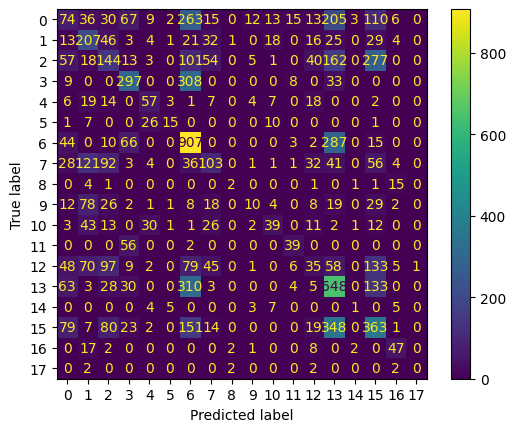

In [ ]:
# confusion matrix of Naive Bayes
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)
print('confusion matrix of Naive Bayes')

7. Radom Forest

In [ ]:
rf=RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_predForest = rf.predict(X_test)
acc_random_forest = metrics.accuracy_score(y_test, y_predForest)
precision_random_forest = metrics.precision_score(y_test, y_predForest, average='micro')
recall_random_forest = metrics.recall_score(y_test, y_predForest, average='micro')
f1_random_forest = metrics.f1_score(y_test, y_predForest, average='micro')

print("* Radom Forest")
print("Accuracy Score: ",acc_random_forest)
print("Precision Score: ",precision_random_forest)
print("Recall Score: ",recall_random_forest)
print("F1 Score: ",f1_random_forest)

* Radom Forest
Accuracy Score:  0.8144231911607461
Precision Score:  0.8144231911607461
Recall Score:  0.8144231911607461
F1 Score:  0.8144231911607461


confusion matrix of Random Forest


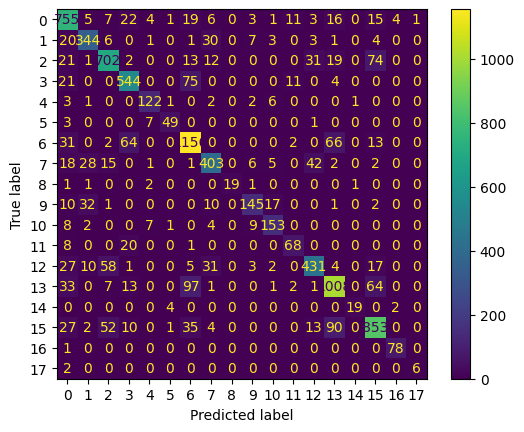

In [ ]:
# confusion matrix of Random Forest
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
print('confusion matrix of Random Forest')

8. Decision Tree:

In [ ]:
decision = tree.DecisionTreeClassifier()
decision.fit(X_train, y_train) 
y_predDes = decision.predict(X_test)
acc_decision_tree = metrics.accuracy_score(y_test, y_predDes)
precision_decision_tree = metrics.precision_score(y_test, y_predDes, average='micro')
recall_decision_tree = metrics.recall_score(y_test, y_predDes, average='micro')
f1_decision_tree = metrics.f1_score(y_test, y_predDes, average='micro')

print("* Decision Tree")
print("Accuracy Score: ",acc_decision_tree)
print("Precision Score: ",precision_decision_tree)
print("Recall Score: ",recall_decision_tree)
print("F1 Score: ",f1_decision_tree)

* Decision Tree
Accuracy Score:  0.8265415231079957
Precision Score:  0.8265415231079957
Recall Score:  0.8265415231079957
F1 Score:  0.8265415231079957


confusion matrix of Decision Tree


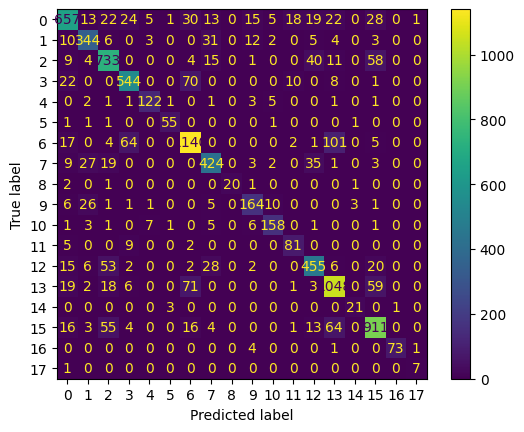

In [ ]:
# confusion matrix of Decision Tree
ConfusionMatrixDisplay.from_estimator(decision, X_test, y_test)
print('confusion matrix of Decision Tree')

9. So sánh các thuật toán:

In [ ]:
# Compare result and draw chart

t = PrettyTable(['','acc','precision','recall','f1'])
t.add_row(['Naive Baye',acc_naive_bayes,precision_naive_bayes,recall_naive_bayes,f1_naive_bayes])
t.add_row(['Radom Forest',acc_random_forest,precision_random_forest,recall_random_forest,f1_random_forest])
t.add_row(['Decision Tree',acc_decision_tree,precision_decision_tree,recall_decision_tree,f1_decision_tree])
print(t)

+---------------+---------------------+---------------------+---------------------+--------------------+
|               |         acc         |      precision      |        recall       |         f1         |
+---------------+---------------------+---------------------+---------------------+--------------------+
|   Naive Baye  | 0.35499584174884163 | 0.35499584174884163 | 0.35499584174884163 | 0.3549958417488416 |
|  Radom Forest |  0.8144231911607461 |  0.8144231911607461 |  0.8144231911607461 | 0.8144231911607461 |
| Decision Tree |  0.8265415231079957 |  0.8265415231079957 |  0.8265415231079957 | 0.8265415231079957 |
+---------------+---------------------+---------------------+---------------------+--------------------+
